# Comparative Analysis of Decision Tree, Random Forest, and Artificial Neural Network Models for Automobile Price Prediction

### Objective 


Decide an appropriate machine learning or deep learning model to predict price.

Choose multiple techniques and compare results on test set.

bring mean_absolute_percentage to lower than 5%

improve performance.




### Data Set Information:

This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

Note: Several of the attributes in the database could be used as a "class" attribute.


Attribute Information:

Attribute: Attribute Range

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.


In [12]:
# IMPORTING LIBRARIES

import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt

In [2]:
# Data Acquisition

path = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
dataframe = pd.read_csv(path,header=None)

# Exploratory Data Analysis(EDA)

In [3]:
dataframe.head(5)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
dataframe.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25],
           dtype='int64')

In [5]:
# Adding headers to columns
# create headers list
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

dataframe.columns=headers

In [6]:
dataframe.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [8]:
# replacing '?' with NAN

dataframe=dataframe.replace('?',np.nan)

In [9]:
dataframe.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [10]:
# Imputing missing values with backfilling methode
dataframe=dataframe.fillna(method='bfill')

In [11]:
# datatype of columns

dataframe.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [12]:
# Bring the columns into correct datatypes

dtype_dict={"symboling":int,"normalized-losses":int,"make":str,"fuel-type":str,"aspiration":str, "num-of-doors":str,"body-style":str,
         "drive-wheels":str,"engine-location":str,"wheel-base":float, "length":float,"width":float,"height":float,"curb-weight":int,"engine-type":str,
         "num-of-cylinders":str, "engine-size":int,"fuel-system":str,"bore":float,"stroke":float,"compression-ratio":float,"horsepower":int,
         "peak-rpm":int,"city-mpg":int,"highway-mpg":int,"price":int}

dataframe=dataframe.astype(dtype_dict)

Text(0.5, 1.0, 'Correlation between Features')

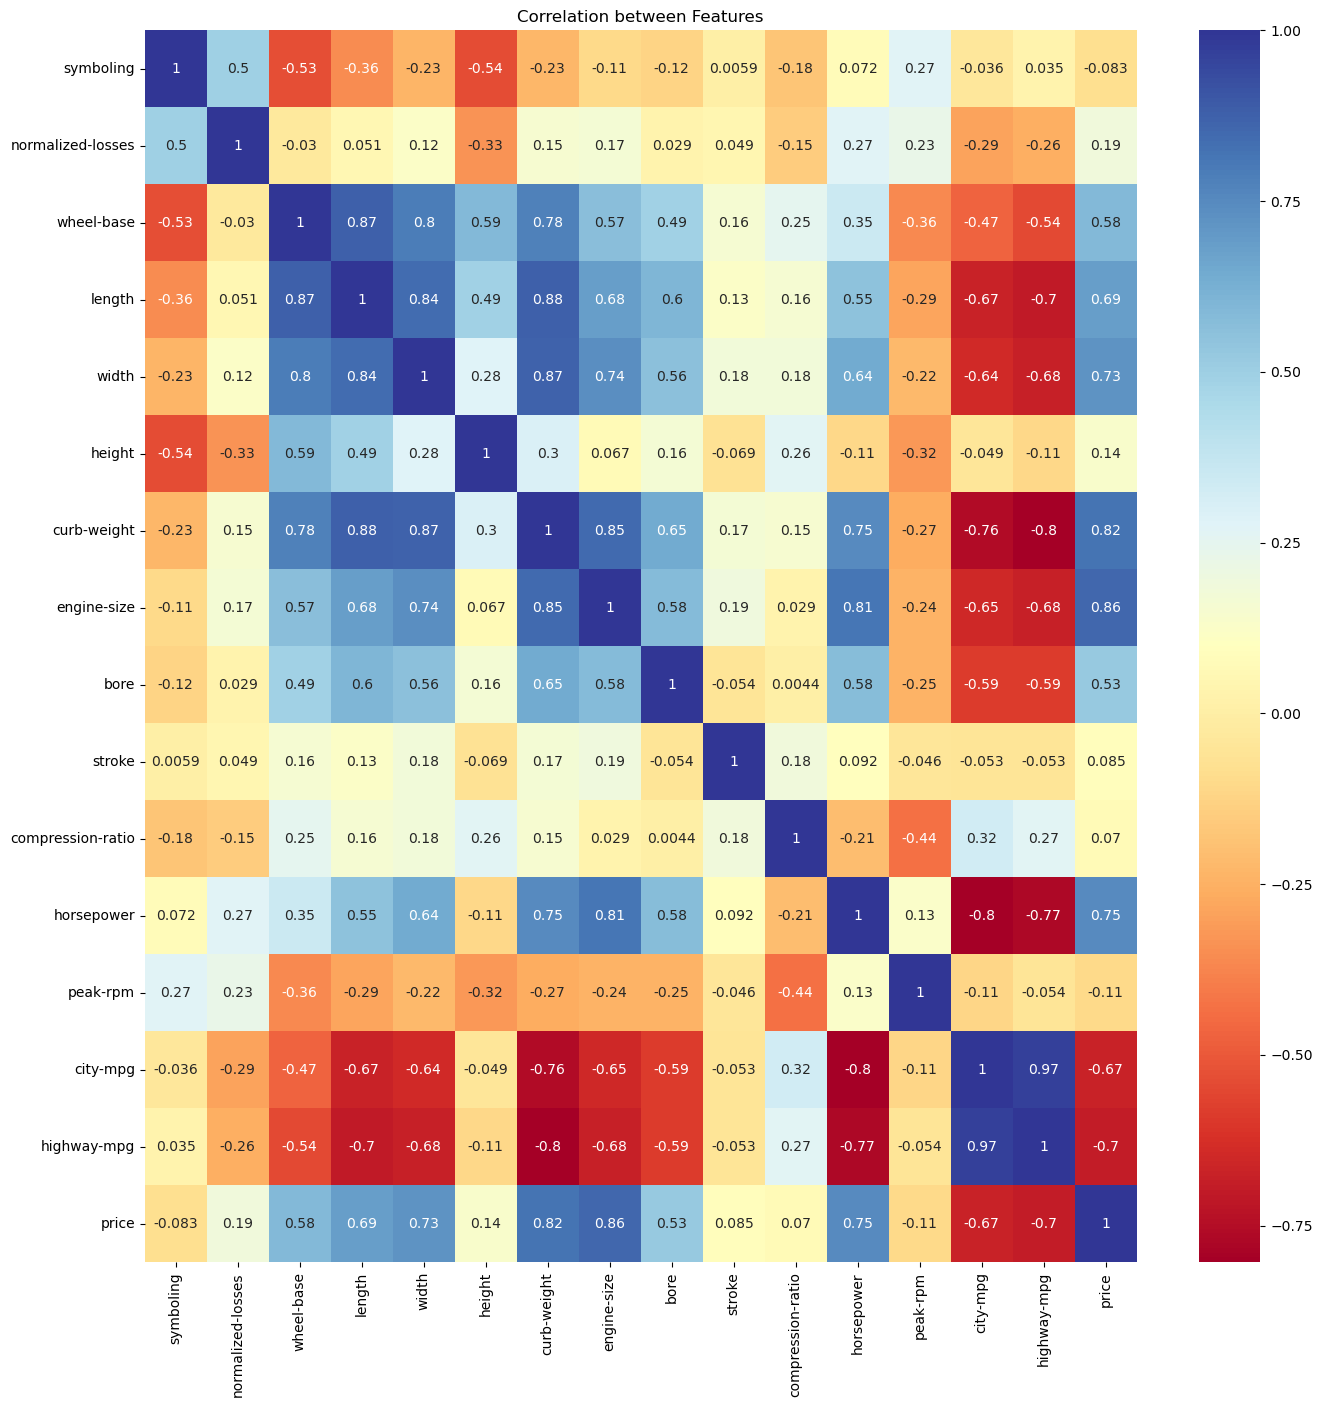

In [13]:
# finding correlation between the columns
plt.figure(figsize=(16, 16))
seaborn.heatmap(dataframe.corr(),annot=True,cmap="RdYlBu")
plt.title('Correlation between Features')

In [14]:
# Pearsons coefficient and p value for given columns

import scipy
scipy.stats.pearsonr(dataframe['price'],dataframe['symboling'])


PearsonRResult(statistic=-0.08303442804459485, pvalue=0.23655258386246245)

In [15]:
scipy.stats.pearsonr(dataframe['price'],dataframe['compression-ratio'])


PearsonRResult(statistic=0.0697605239185067, pvalue=0.32026053636537155)

In [16]:
scipy.stats.pearsonr(dataframe['price'],dataframe['normalized-losses'])


PearsonRResult(statistic=0.1882174317579391, pvalue=0.006880312118127955)

In [17]:
scipy.stats.pearsonr(dataframe['price'],dataframe['peak-rpm'])
      

PearsonRResult(statistic=-0.10500577603753056, pvalue=0.13402775443446815)

In [18]:
# drop the columns with correalation with price <0.2

dataframe=dataframe.drop(columns=['symboling','compression-ratio','normalized-losses','peak-rpm'])

In [19]:
dataframe

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,horsepower,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,dohc,four,130,mpfi,3.47,2.68,111,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,dohc,four,130,mpfi,3.47,2.68,111,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,ohcv,six,152,mpfi,2.68,3.47,154,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,ohc,four,109,mpfi,3.19,3.40,102,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,ohc,five,136,mpfi,3.19,3.40,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,ohc,four,141,mpfi,3.78,3.15,114,23,28,16845
201,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,ohc,four,141,mpfi,3.78,3.15,160,19,25,19045
202,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,ohcv,six,173,mpfi,3.58,2.87,134,18,23,21485
203,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,ohc,six,145,idi,3.01,3.40,106,26,27,22470


In [20]:
# getting dummies for categorical Features
      

data=pd.get_dummies(dataframe,columns=['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system'])


In [21]:
type(data)



pandas.core.frame.DataFrame

In [22]:
data

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,horsepower,city-mpg,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,111,21,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,111,21,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,154,19,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,102,24,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,115,18,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,114,23,...,0,0,0,0,0,0,0,1,0,0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,160,19,...,0,0,0,0,0,0,0,1,0,0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,134,18,...,0,0,0,0,0,0,0,1,0,0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,106,26,...,0,0,0,0,0,1,0,0,0,0


In [23]:
# seperating predictors and response variables

y=data['price']
X=data.drop(columns=['price'])

In [24]:
# splitting data for training and testing

from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,random_state=32,shuffle=True)

In [25]:
Xtrain.shape

(153, 71)

In [26]:
Xtest.shape

(52, 71)

In [27]:
# scaling data with standard scaler

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train=scaler.fit_transform(Xtrain)
X_test=scaler.transform(Xtest)

In [28]:
# Converting ytrain and ytest into numpyarray
y_train=np.array(ytrain)
y_test=np.array(ytest)

# Machine Learning

## Decision Tree model

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


In [31]:
# create object of type DecisionTreeRegressor
DTR= DecisionTreeRegressor()



criterion = ['friedman_mse', 'absolute_error'] #calculating the error of prediction
splitter = ['best','random']
max_depth = [1, 5, 10, None]
min_samples_split = [2, 3, 5]
min_samples_leaf = [1, 2, 3]
min_weight_fraction_leaf = [0,0.25,0.5]
max_features = [None, 'auto', 'sqrt', 'log2']
max_leaf_nodes = [None, 2, 5]
min_impurity_decrease = [0,1,3]
ccp_alpha = [0,1,3]

# hyper-Parameter dictionary
param_dict = dict(criterion = criterion,
                  splitter= splitter,
                  max_depth = max_depth,
                  min_samples_split = min_samples_split,
                  min_samples_leaf = min_samples_leaf,
                  min_weight_fraction_leaf = min_weight_fraction_leaf,
                  max_features  = max_features,
                  max_leaf_nodes = max_leaf_nodes,
                  min_impurity_decrease = min_impurity_decrease,
                  ccp_alpha =ccp_alpha)

In [32]:
# creating grid to find out best hyper-parameters of Decision Tree Model
grid=GridSearchCV(estimator=DTR,param_grid=param_dict,scoring='neg_root_mean_squared_error',verbose=1)

In [33]:
# Training the model
grid_result=grid.fit(X_train,y_train)

Fitting 5 folds for each of 46656 candidates, totalling 233280 fits


In [34]:
# best Decision Tree model
best_DTR_model=grid_result.best_estimator_

In [35]:
best_DTR_model

DecisionTreeRegressor(ccp_alpha=3, criterion='friedman_mse',
                      max_features='log2', min_impurity_decrease=3,
                      min_samples_split=5, min_weight_fraction_leaf=0,
                      splitter='random')

In [36]:
# prediction on test set using Decision Tree model
ypred_DTR=best_DTR_model.predict(X_test)

In [37]:
ypred_DTR

array([14572.        , 19699.        ,  6381.75      , 16430.        ,
        9285.        ,  8032.25      ,  8001.        ,  8032.25      ,
        8830.5       , 15132.33333333, 17293.33333333, 11500.66666667,
        6295.        ,  8921.        ,  9095.        ,  8001.        ,
        9995.        ,  6413.        , 15132.33333333,  8032.25      ,
       15132.33333333,  8636.33333333, 34968.75      , 10364.66666667,
       22213.33333333, 11048.        ,  6413.        ,  8001.        ,
        6381.75      ,  6381.75      ,  8921.        , 13995.66666667,
       15132.33333333,  9024.66666667, 11500.66666667,  9995.        ,
        9824.        , 16695.        ,  7198.        , 13740.        ,
       13411.66666667,  8999.        , 16194.25      ,  8999.        ,
        5911.5       , 16124.        ,  6381.75      , 14653.33333333,
       40700.        , 17461.5       , 14653.33333333,  5911.5       ])

In [38]:
# calculating model performance
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, ypred_DTR)

0.1528754627141355

# random forest model

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# creating RandomForest model
priceRF = RandomForestRegressor()

#how many decision trees?
n_estimators=[2, 5, 10]

criterion = ['squared_error','absolute_error'] #calculating the error of prediction
splitter = ['best','random']
max_depth = [1, 5,None]
min_samples_split = [2, 3, 5]
min_samples_leaf = [1, 2, 3, 5]
min_weight_fraction_leaf = [0,0.25,0.5]
max_features = ['sqrt', 'log2']
max_leaf_nodes = [3, 4, 5]
min_impurity_decrease = [0,1,2,3]
ccp_alpha = [0,1,2,3]

param_dict = dict(n_estimators=n_estimators,
                  criterion = criterion,
                  max_depth = max_depth,
                  min_samples_split = min_samples_split,
                  min_samples_leaf = min_samples_leaf,
                  min_weight_fraction_leaf = min_weight_fraction_leaf,
                  max_features  = max_features,
                  max_leaf_nodes = max_leaf_nodes,
                  min_impurity_decrease = min_impurity_decrease,
                  ccp_alpha =ccp_alpha)

grid1= GridSearchCV(estimator=priceRF, param_grid=param_dict, scoring = 'neg_root_mean_squared_error', verbose=1)

In [41]:
# training the model with training data
grid_result1=grid1.fit(X_train, y_train)

Fitting 5 folds for each of 62208 candidates, totalling 311040 fits


In [42]:
finalmodel = grid_result1.best_estimator_


In [43]:
finalmodel

RandomForestRegressor(ccp_alpha=2, max_depth=5, max_features='sqrt',
                      max_leaf_nodes=5, min_impurity_decrease=3,
                      min_samples_split=3, min_weight_fraction_leaf=0,
                      n_estimators=10)

In [44]:
# predicting on test set
ypred_RF=finalmodel.predict(X_test)

In [45]:
ypred_RF

array([13709.87645573, 15458.28191771,  8558.09314517,  9299.83408886,
        8558.09314517, 10725.43697011,  8558.09314517,  8558.09314517,
       10013.02594332, 17180.86492714, 15421.47122728,  8558.09314517,
        8558.09314517,  9017.96191912,  8919.37303023, 10725.43697011,
       10374.30582838,  9660.9585333 , 16474.33559381, 10374.30582838,
       16809.00226048, 10886.50979975, 29271.60661311, 11128.91754832,
       17180.86492714,  8558.09314517,  8558.09314517,  9270.50417196,
        8558.09314517,  8558.09314517, 11841.3285751 , 14701.75156278,
       16809.00226048,  9299.83408886, 10386.39577695, 11128.91754832,
       12583.06951879, 15432.2094495 ,  8558.09314517, 15432.2094495 ,
       14301.20509579,  9017.96191912, 11542.5326308 ,  8919.37303023,
        8558.09314517, 17180.86492714,  8558.09314517, 12285.21354256,
       33451.85230769, 16485.07381603, 16382.81908666,  8558.09314517])

In [46]:
# calculating model performance
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, ypred_RF)

0.2050172017551657

# ANN model

In [48]:
# splitting the data into train test and validation
Xtrain,Xval,ytrain,yval=train_test_split(Xtrain,ytrain,random_state=32,shuffle=True)

In [49]:
# scaling data with standard scaler

X_train=scaler.transform(Xtrain)
X_val=scaler.transform(Xval)

In [50]:
# Converting ytrain and yval into numpyarray
y_train=np.array(ytrain)
y_val=np.array(yval)

In [51]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout

In [52]:
# creating ANN model
priceANN=Sequential()

In [53]:
# flatten the model
priceANN.add(Flatten())

In [54]:
# adding layers and units to ANN model

# input layer
priceANN.add(Dense(units=71,activation='relu'))
priceANN.add(Dropout(rate=0.1))

# output layer
priceANN.add(Dense(units=1))

In [55]:
# Regularization and compile

from tensorflow.keras.optimizers.schedules import ExponentialDecay
from keras.optimizers import Adam
'''
ExponentialDecay - with iterations reduce the learning rate
'''
initial_learning_rate = 0.001
lr=ExponentialDecay(initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

priceANN.compile(loss="mean_squared_error", 
                  metrics='mean_absolute_percentage_error', 
                  optimizer=Adam(learning_rate=lr)
                  )

In [56]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


'''
EarlyStopping( - when metric doesnt improve for certain epochs we stop training
 
ReduceLROnPlateau( - reduce learning rate if no improvement in metric
 
'''
es = EarlyStopping(monitor="val_mean_absolute_percentage_error",mode='min', patience=10, verbose=1)
#rd = ReduceLROnPlateau(monitor="val_accuracy",factor=0.1,patience=5,verbose=1)

mc = ModelCheckpoint(filepath='bestmodel2.h5', monitor='val_mean_absolute_percentage_error', mode='min', verbose=1, save_best_only=True)

In [57]:
history = priceANN.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[mc,es])

Epoch 1/100
1/4 [======>.......................] - ETA: 2s - loss: 255596608.0000 - mean_absolute_percentage_error: 99.9935
Epoch 1: val_mean_absolute_percentage_error improved from inf to 99.99261, saving model to bestmodel2.h5
4/4 [==============================] - 1s 97ms/step - loss: 255946640.0000 - mean_absolute_percentage_error: 99.9927 - val_loss: 242738464.0000 - val_mean_absolute_percentage_error: 99.9926
Epoch 2/100
1/4 [======>.......................] - ETA: 0s - loss: 278385248.0000 - mean_absolute_percentage_error: 99.9931
Epoch 2: val_mean_absolute_percentage_error improved from 99.99261 to 99.99140, saving model to bestmodel2.h5
4/4 [==============================] - 0s 26ms/step - loss: 255939152.0000 - mean_absolute_percentage_error: 99.9916 - val_loss: 242732144.0000 - val_mean_absolute_percentage_error: 99.9914
Epoch 3/100
1/4 [======>.......................] - ETA: 0s - loss: 277414528.0000 - mean_absolute_percentage_error: 99.9894
Epoch 3: val_mean_absolute_percen

1/4 [======>.......................] - ETA: 0s - loss: 258413472.0000 - mean_absolute_percentage_error: 99.8839
Epoch 39: val_mean_absolute_percentage_error improved from 99.89989 to 99.89521, saving model to bestmodel2.h5
4/4 [==============================] - 0s 22ms/step - loss: 255143488.0000 - mean_absolute_percentage_error: 99.8693 - val_loss: 242150688.0000 - val_mean_absolute_percentage_error: 99.8952
Epoch 40/100
1/4 [======>.......................] - ETA: 0s - loss: 247043280.0000 - mean_absolute_percentage_error: 99.8613
Epoch 40: val_mean_absolute_percentage_error improved from 99.89521 to 99.89050, saving model to bestmodel2.h5
4/4 [==============================] - 0s 19ms/step - loss: 255077424.0000 - mean_absolute_percentage_error: 99.8621 - val_loss: 242120128.0000 - val_mean_absolute_percentage_error: 99.8905
Epoch 41/100
1/4 [======>.......................] - ETA: 0s - loss: 327759040.0000 - mean_absolute_percentage_error: 99.8564
Epoch 41: val_mean_absolute_percenta

1/4 [======>.......................] - ETA: 0s - loss: 308274336.0000 - mean_absolute_percentage_error: 99.5627
Epoch 77: val_mean_absolute_percentage_error improved from 99.60458 to 99.59310, saving model to bestmodel2.h5
4/4 [==============================] - 0s 23ms/step - loss: 252492832.0000 - mean_absolute_percentage_error: 99.4856 - val_loss: 240254800.0000 - val_mean_absolute_percentage_error: 99.5931
Epoch 78/100
1/4 [======>.......................] - ETA: 0s - loss: 218916288.0000 - mean_absolute_percentage_error: 99.5446
Epoch 78: val_mean_absolute_percentage_error improved from 99.59310 to 99.58160, saving model to bestmodel2.h5
4/4 [==============================] - 0s 19ms/step - loss: 252455408.0000 - mean_absolute_percentage_error: 99.4745 - val_loss: 240184496.0000 - val_mean_absolute_percentage_error: 99.5816
Epoch 79/100
1/4 [======>.......................] - ETA: 0s - loss: 411049984.0000 - mean_absolute_percentage_error: 99.3886
Epoch 79: val_mean_absolute_percenta

In [58]:
#ANN architecture

priceANN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 71)                0         
                                                                 
 dense (Dense)               (None, 71)                5112      
                                                                 
 dropout (Dropout)           (None, 71)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 72        
                                                                 
Total params: 5,184
Trainable params: 5,184
Non-trainable params: 0
_________________________________________________________________


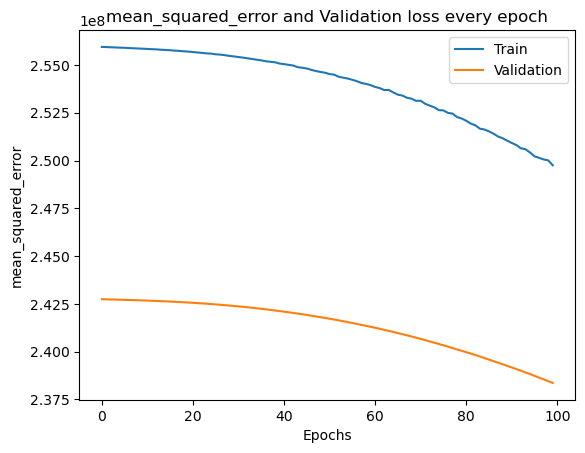

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('mean_squared_error')
plt.legend(['Train', 'Validation'])
plt.title('mean_squared_error and Validation loss every epoch')
plt.show()

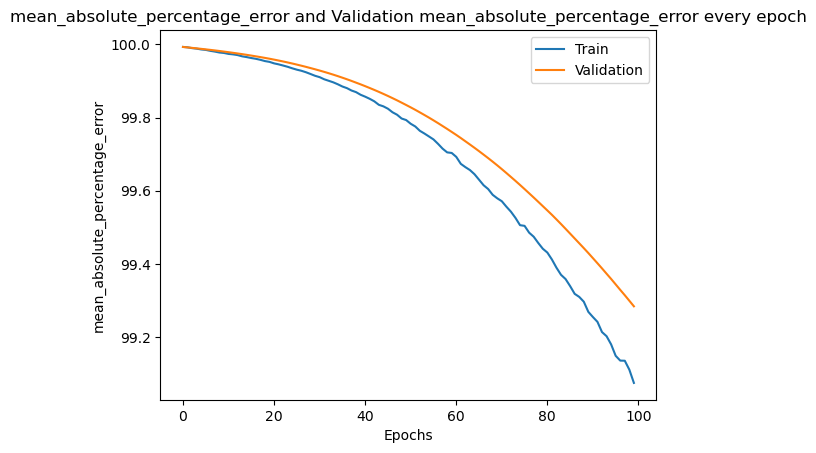

In [63]:
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.xlabel('Epochs')
plt.ylabel('mean_absolute_percentage_error')
plt.legend(['Train', 'Validation'])
plt.title('mean_absolute_percentage_error and Validation mean_absolute_percentage_error every epoch')
plt.show()

In [65]:
from keras import models
bestmodel_ANN=models.load_model('bestmodel2.h5')

In [66]:
ypred = bestmodel_ANN.predict(X_test)

2/2 [==============================] - 0s 12ms/step


In [67]:
bestmodel_ANN.evaluate(X_test, y_test)

2/2 [==============================] - 0s 9ms/step - loss: 180807264.0000 - mean_absolute_percentage_error: 99.1256


[180807264.0, 99.12560272216797]

# Conclusion

Based on the mean absolute percentage error (MAPE) values, the decision tree model performed the best, with a MAPE of 0.153, followed by the random forest model with a MAPE of 0.205. The artificial neural network model performed very poorly with a MAPE of 99.12, indicating overfitting or poor model design.

In conclusion, this project involved exploring and preprocessing the automobile dataset to develop models for predicting automobile prices. we were able to develop three models: decision tree, random forest, and artificial neural network.then best parameters of decision Tree and random forest were determined with hyperparameter tunning through GridsearchCv,and ANN(artificial neural network) hyperparamter tunning was done manually to get best performing Model. Among these, the decision tree and random forest models performed well on test data, with the decision tree model being the better of the two.

Therefore, the decision tree model should be selected as the final model for predicting automobile prices. However, it is important to note that this conclusion is based on the MAPE metric alone and further evaluation may be required, such as looking at the accuracy of the predictions and potential bias in the model.